<a href="https://colab.research.google.com/github/lesliederas/4105/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Model for X1 with Learning Rate 0.1:
Y = 5.93 + -2.04 * X1



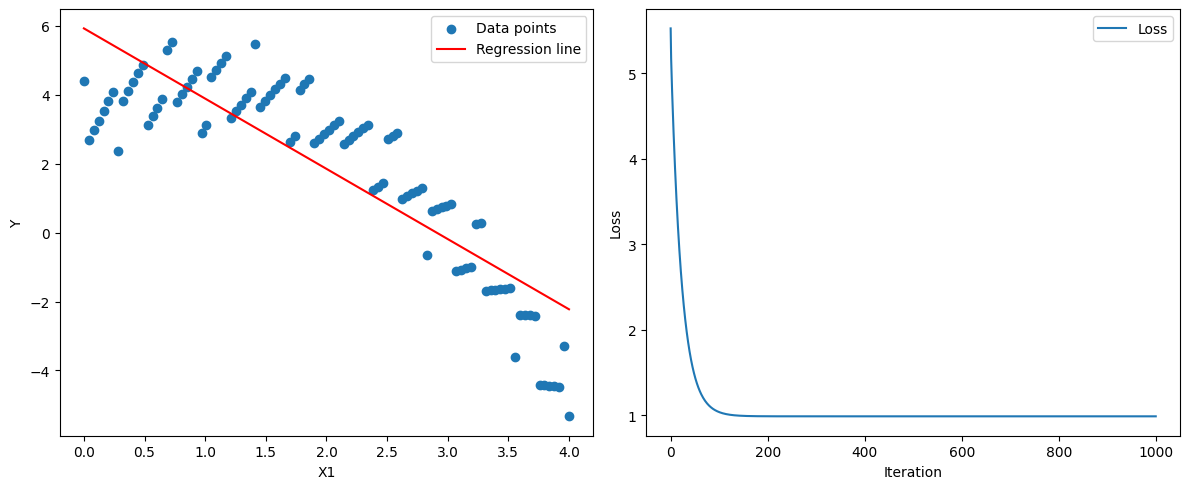

Linear Model for X1 with Learning Rate 0.05:
Y = 5.93 + -2.04 * X1



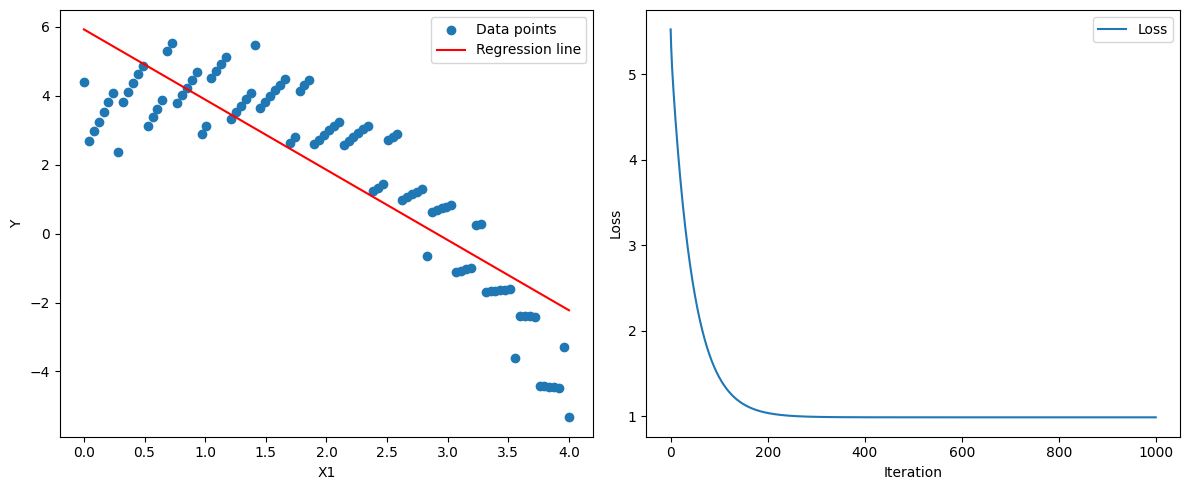

Linear Model for X1 with Learning Rate 0.01:
Y = 5.29 + -1.79 * X1



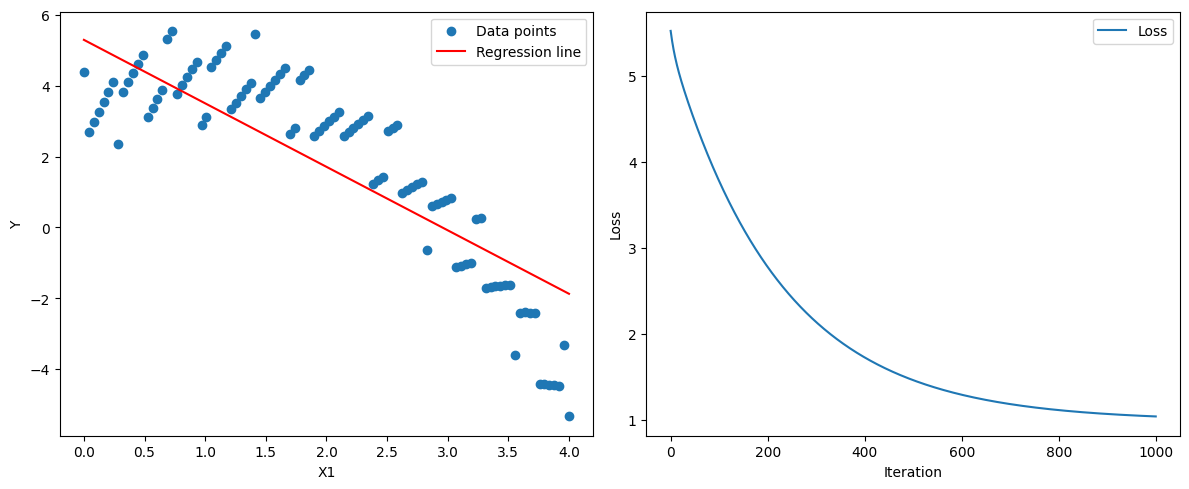

Linear Model for X2 with Learning Rate 0.1:
Y = 0.74 + 0.56 * X2



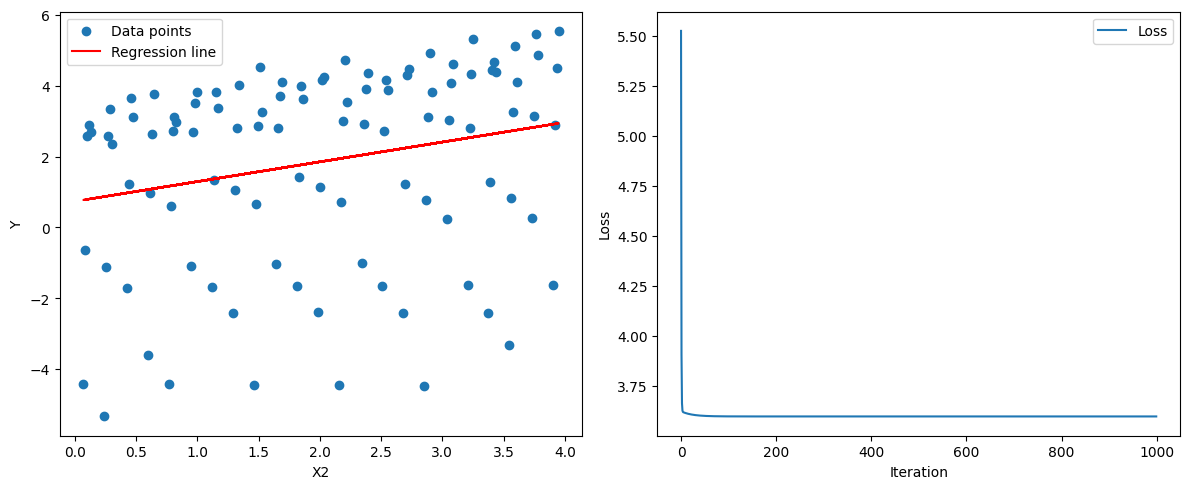

Linear Model for X2 with Learning Rate 0.05:
Y = 0.74 + 0.56 * X2



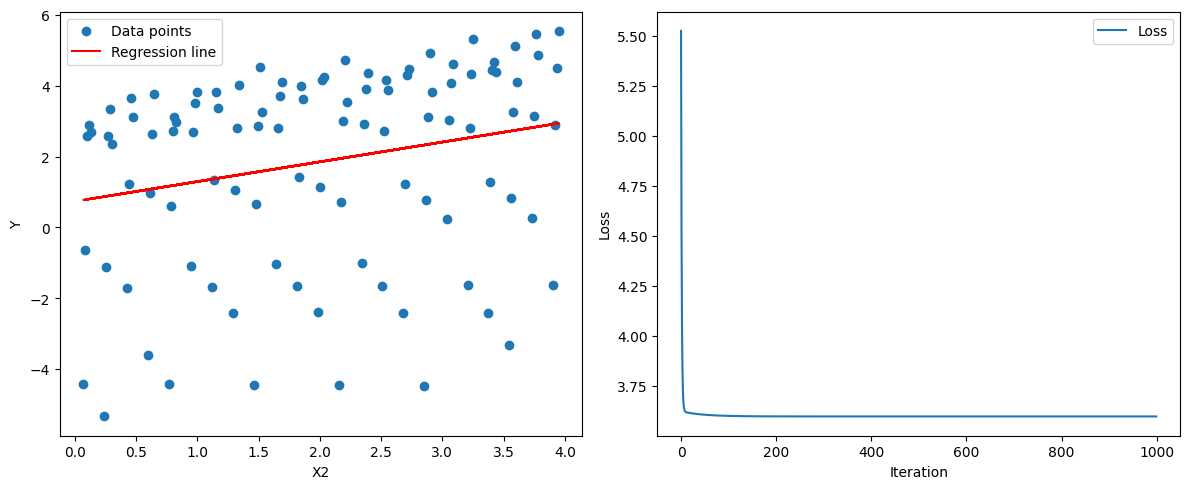

Linear Model for X2 with Learning Rate 0.01:
Y = 0.69 + 0.58 * X2



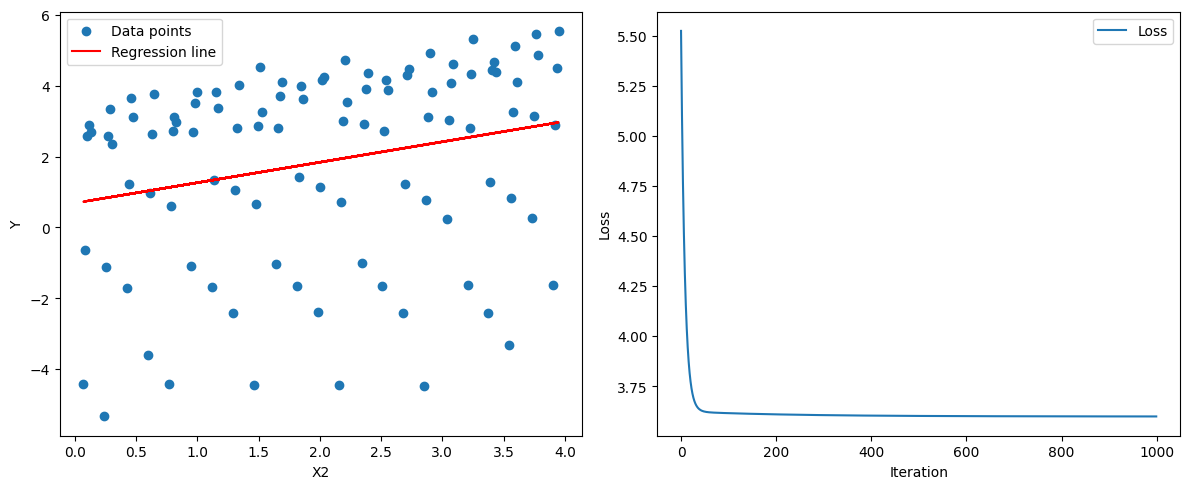

Linear Model for X3 with Learning Rate 0.1:
Y = 2.87 + -0.52 * X3



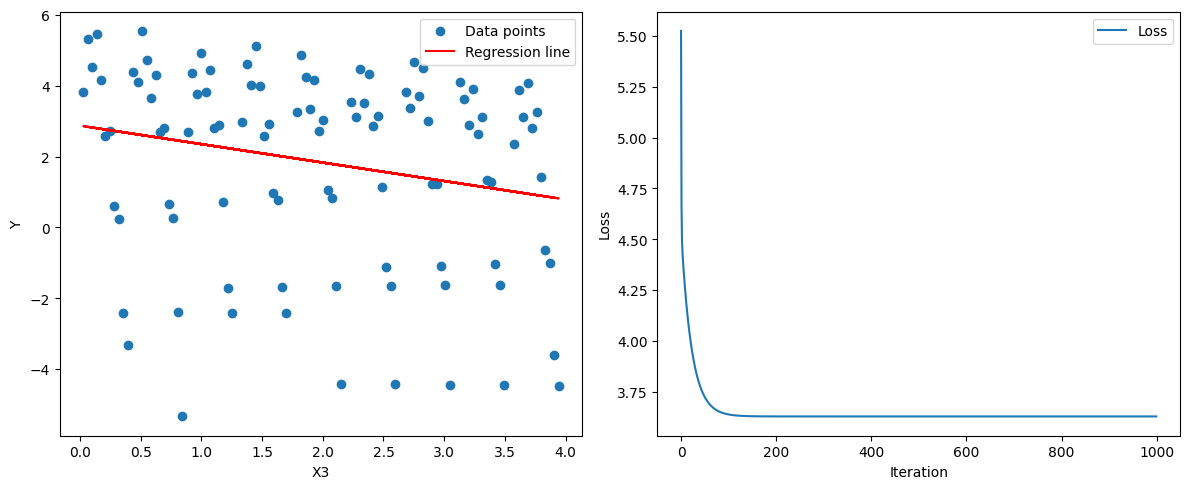

Linear Model for X3 with Learning Rate 0.05:
Y = 2.87 + -0.52 * X3



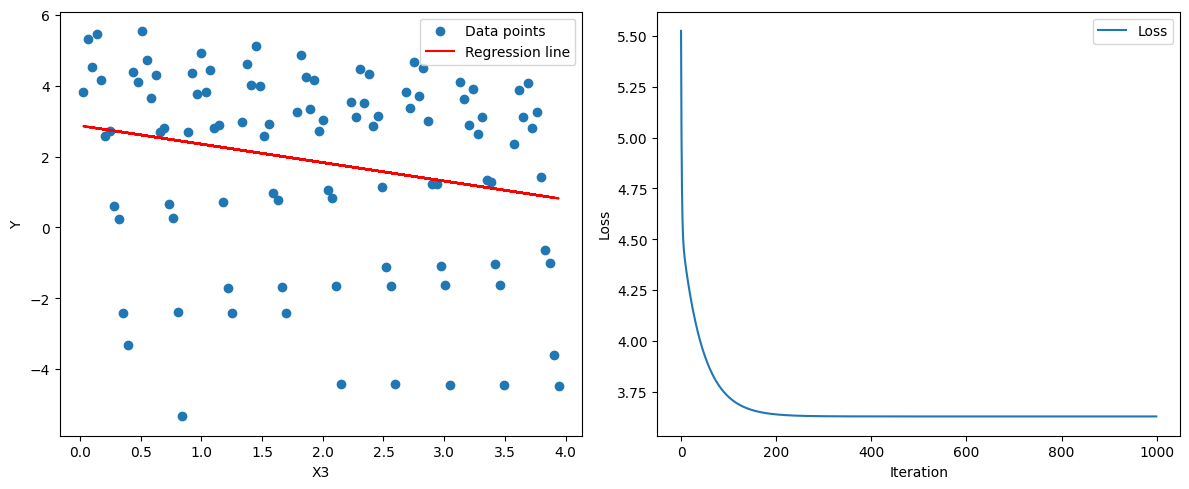

Linear Model for X3 with Learning Rate 0.01:
Y = 2.59 + -0.41 * X3



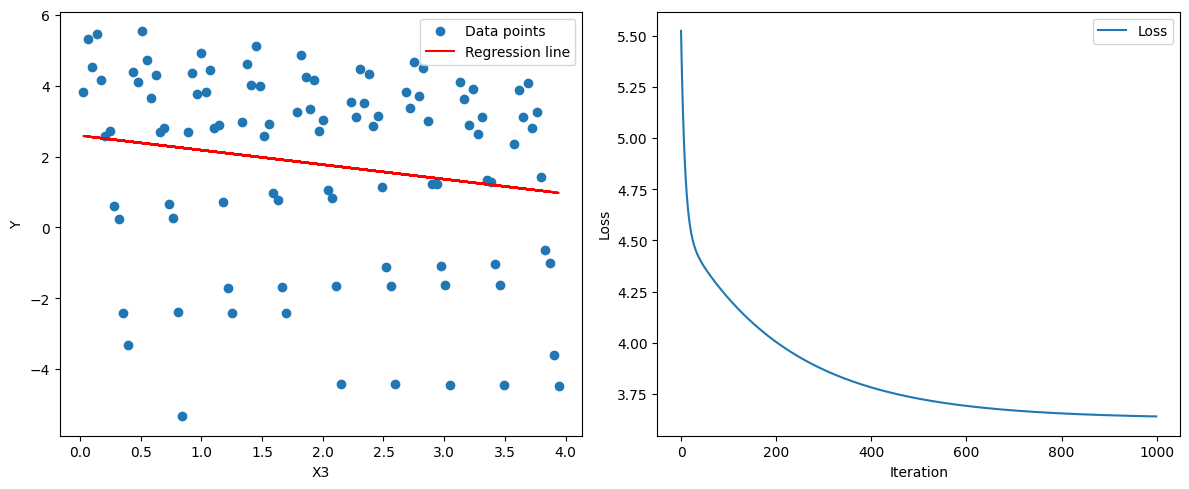

The explanatory variable X1 has the lowest final loss.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('D3.csv')
X = data.iloc[:, :3].values
Y = data.iloc[:, 3].values
def gradient_descent(X, Y, learning_rate, num_iterations):
    m = len(Y)
    X = np.column_stack((np.ones(m), X))
    theta = np.zeros(X.shape[1])

    loss_history = []

    for iteration in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - Y
        gradient = np.dot(X.T, errors) / m
        theta = theta - learning_rate * gradient
        loss = np.sum(errors**2) / (2 * m)
        loss_history.append(loss)

    return theta, loss_history

def plot_results(X, Y, theta, loss_history, variable_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, label='Data points')
    plt.plot(X, np.dot(np.column_stack((np.ones(len(X)), X)), theta), color='red', label='Regression line')
    plt.xlabel(variable_name)
    plt.ylabel('Y')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(loss_history, label='Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
learning_rates = [0.1, 0.05, 0.01]
num_iterations = 1000

for i in range(3):
    current_X = X[:, i]
    current_variable_name = f'X{i + 1}'

    for learning_rate in learning_rates:
        theta, loss_history = gradient_descent(current_X, Y, learning_rate, num_iterations)

        print(f"Linear Model for {current_variable_name} with Learning Rate {learning_rate}:\n"
              f"Y = {theta[0]:.2f} + {theta[1]:.2f} * {current_variable_name}\n")

        plot_results(current_X, Y, theta, loss_history, current_variable_name)

final_losses = []

for i in range(3):
    current_X = X[:, i]
    theta, loss_history = gradient_descent(current_X, Y, learning_rates[0], num_iterations)
    final_losses.append(loss_history[-1])

lowest_loss_variable = np.argmin(final_losses) + 1
print(f"The explanatory variable X{lowest_loss_variable} has the lowest final loss.")




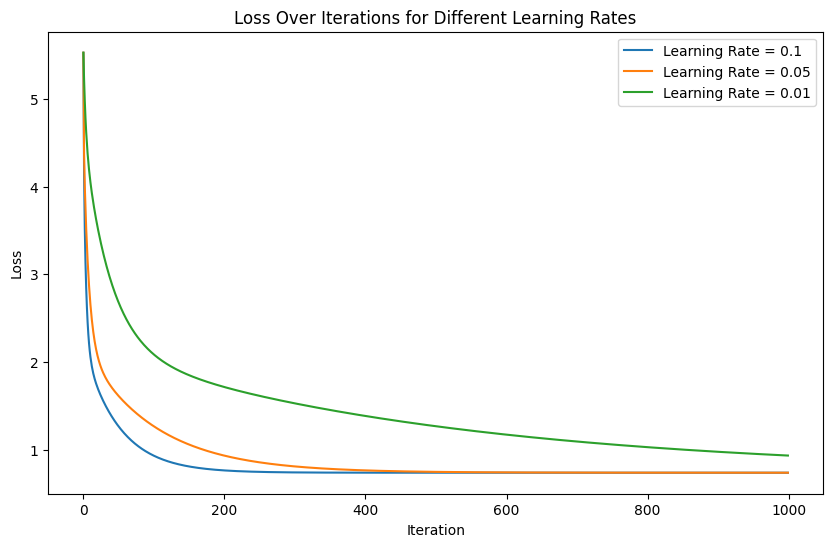

Best Linear Model with Learning Rate 0.1:
Y = 5.31 + -2.00 * X1 + 0.53 * X2 + -0.27 * X3

Predictions for new values:
For (X1, X2, X3) = (1, 1, 1), predicted Y = 3.58
For (X1, X2, X3) = (2, 0, 4), predicted Y = 0.24
For (X1, X2, X3) = (3, 2, 1), predicted Y = 0.10


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('D3.csv')
X = data.iloc[:, :3].values
Y = data.iloc[:, 3].values

def gradient_descent(X, Y, learning_rate, num_iterations):
    m = len(Y)
    X = np.column_stack((np.ones(m), X))
    theta = np.zeros(X.shape[1])

    loss_history = []

    for iteration in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - Y
        gradient = np.dot(X.T, errors) / m
        theta = theta - learning_rate * gradient
        loss = np.sum(errors**2) / (2 * m)
        loss_history.append(loss)

    return theta, loss_history


def plot_loss(loss_history, learning_rate):
    plt.plot(loss_history, label=f'Learning Rate = {learning_rate}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

learning_rates = [0.1, 0.05, 0.01]
num_iterations = 1000

plt.figure(figsize=(10, 6))

for learning_rate in learning_rates:
    theta, loss_history = gradient_descent(X, Y, learning_rate, num_iterations)

    plot_loss(loss_history, learning_rate)


plt.title('Loss Over Iterations for Different Learning Rates')
plt.show()

best_learning_rate = learning_rates[np.argmin(plot_loss)]
best_theta, _ = gradient_descent(X, Y, best_learning_rate, num_iterations)

print(f"Best Linear Model with Learning Rate {best_learning_rate}:\n"
      f"Y = {best_theta[0]:.2f} + {best_theta[1]:.2f} * X1 + {best_theta[2]:.2f} * X2 + {best_theta[3]:.2f} * X3\n")


new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])

predictions = np.dot(np.column_stack((np.ones(new_values.shape[0]), new_values)), best_theta)
print(f"Predictions for new values:")
for i, prediction in enumerate(predictions):
    print(f"For (X1, X2, X3) = {tuple(new_values[i])}, predicted Y = {prediction:.2f}")

